# Embeddings

Nesta aula, discutiremos um tipo de representação vetorial que lida com os problemas das representações que vimos até agora. Este tipo de representação consegue capturar relações semânticas bem como lida melhor com o contexto de uma palavra numa frase. Assim, uma mesma palavra usada em contextos diferentes consegue ser representada pelo mesmo vetor.

Nesta aula, vamos aprender sobre embeddings, como cria-los e como usá-los em algoritmos de machine learning. Acompanhe pelo jupyter notebook a execução dos códigos.

Nas representações que vimos até aqui, descobrimos várias fraquezas que fazem com que esses modelos se tornem impraticáveis de serem usados em grandes conjuntos de dados.

1. Elas são representações discretas, ou seja, tratam as unidades de linguagem como unidades atômicas, o que as impede de capturar relações entre palavras.

2. Os vetores de características são representações esparsas e de alta dimensionalidade. Vetores gigantes com muitos 0;

3. Não sabem lidar com novas palavras fora do vocabulário.

Assim, surgiram as **Representações Distrbuídas**, vetores compactos e densos para representar palavras, compostas por:

Primeiramente, ideia de **Similaridade Distribucional**, que representa o conceito de que o significado de uma palavra pode ser entendido a partir do contexto em que aparece. Isto é conhecido também como conotação, ou seja, o significado é definido pelo contexto. Diferente de denotação, que é o significado literal de uma palavra.

O segundo ponto é a **Hipótese Distribucional**, que diz que palavras que aparecem em contextos similares possuem significados similares. Assim, se palavras podem ser representadas por vetores, então duas palavras que aparecem em contextos similares devem possuir vetores similares.

O terceiro refere-se à **Representação Distribucional**, que são os vetores de representação que vimos até o presente momento, caracterizados pela alta dimensão e grande esparsidade.

# Motivação

Segundo o dicionário, significado pode ser essas três coisas:

- Definição atribuída a um termo, palavra, frase ou texto; acepção
- Aquilo que alguma coisa quer dizer; sentido
- Uma ideia que é representada por uma palavra ou frase

Logo, percebemos que as representações usadas até aqui perdiam exatamente esse tipo de informação, ou seja:

- Havia perda de nuances. Exemplo: sinônimos - apto, bom, expert.
- Novas palavras. Exemplo:
- Como eu não levo em consideração o contexto, é difícil calcular a similaridade entre palavras.

Dessa maneira, precisamos de uma representação que consiga capturar tais relações entre diferentes palavras levando em consideração o contexto. Para resolver esse problema, usaremos representações baseadas em similaridade distribucional.

Mas como capturar a relação de uma palavra com seus vizinhos e representar isso através de um vetor denso? Vamos fazer uma analogia.

Uma pessoa é definidia por diversos traços de personalidade como Extrovertida/Introvertida, Feliz/Triste que podem ser representadas em uma escala de -1 a 1. O conjunto dessas características podem ser representadas por um vetor:

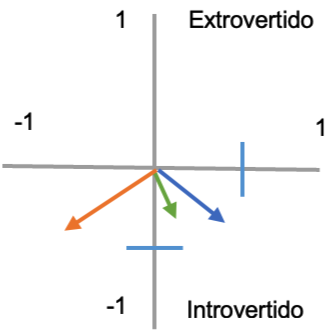

Com esses vetores numéricos, é possível usar uma métrica de distância, distância do cosseno ou Euclidiana, por exemplo, e verificar o quão similar dois vetores são. Essa é a ideia por trás dos Words Embeddings.

A técnica que deu início aos Words Embeddings foi divulgada num paper de 2013, do Google. Essa técnica recebeu o nome de Word2Vec e vamos entender seu funcionamento agora.

# Word2Vec

Se eu fornecer a palavra “Brasil”, outras palavras com similaridade distribucional a essa poderiam ser outros países (“Chile”, “Uruguai”, etc.). Se eu forneço a palavra “Bela”, poderia pensar em sinônimos ou antônimos como palavras com similaridade distribucional. Ou seja, o que estamos tentando capturar são palavras que possuem alta probabilidade de aparecerem num mesmo contexto.

Word2Vec garante que a representação aprendida possui baixa dimensionalidade (palavras são representadas por vetores de 50-1000 dimensões) e são densas (a maioria dos valores dos vetores são diferentes de zero). Tais representações tornam as tarefas de modelos de machine learning mais eficientes.

Dado um corpus de texto, o objetivo é aprender embeddings de cada palavra no corpus de modo que o vetor da palavra no espaço de embeddings melhor captura o significado da palavra. Para isso, Word2Vec usa similaridade distribucional e hipótese distribucional, ou seja, extrai o significado de uma palavra a partir do seu contexto. Assim, se duas palavras geralmente ocorrem em contextos similares, é altamente provável que seus significados sejam também similares.

# Embeddings pré-treinados

Um embedding pré-treinado nada mais é que o processo de treinar um embedding num grande corpus de dados e disponibilizar os vetores na internet. Assim, eles podem ser baixados e usados em várias aplicações que você deseja. Tais embeddings podem ser entendidos como uma grande coleção de pares de chave-valor, em que as chaves representam as palavras no vocabulário e os valores seus vetores correspondentes.


# Construindo Embedding com Word2Vec

- CBoW (Continuous Bag of Words)

O objetivo é construir um modelo que corretamente prediga a palavra central dadas as palavras que estão num contexto dela. Para exemplificar esse conceito, vamos usar um simples exemplo como se fosse nosso corpus: “the quick brown fox jumps over the lazy frog”.

Se considerarmos a palavra “jumps” como a palavra central, então seu contexto será formado pelas palavras em sua vizinhança. Tomando uma janela de tamanho 2 para definir o contexto de uma palavra, o contexto de “jumps” seriam as palavras “brown”, “fox”, “over” e “the”.

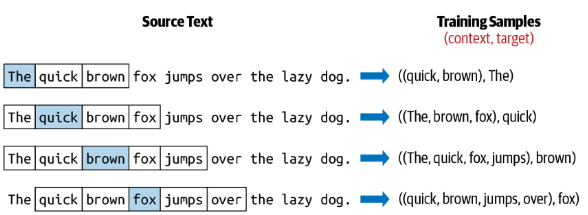

- Skipgram

O objetivo é predizer as palavras num contexto de uma palavra central. Usando o mesmo corpus do exemplo dado no CBOW, esse seria o processo de treino para o skipgram:

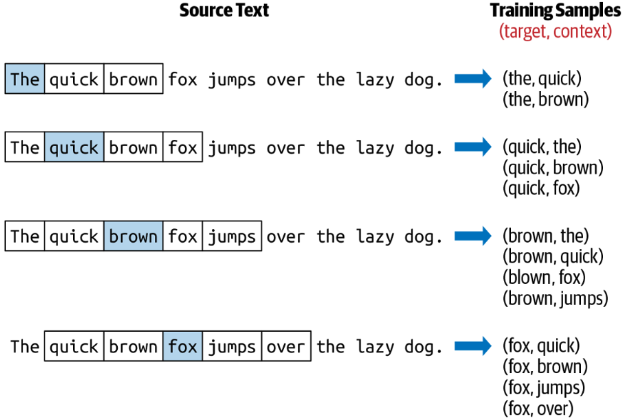

Na prática, o que estamos construindo é uma rede neural com uma camada de input, uma camada intermediária e uma cada de saída (isso vale tanto para o CBOW quanto para o SkipGram, mas para efeitos didáticos, vamos tomar o SkipGram como padrão a partir de agora). Entretanto, o objetivo final não é usar essa rede treinada, mas usar apenas os pesos aprendidos na camada intermediária da rede. Vamos entender isso em detalhes.

Você pode ter notado que nossa rede possui uma quantidade muito grande de pesos. No exemplo dado, há 3 milhões de pesos entre a camada de entrada e a camada oculta e mais 3 milhões de pesos entre a camada oculta e a camada de saída. Realizar um treino com essas especificações num dataset grande é proibitivo. Pensando nisso, os estudiosos propuseram uma maneira eficiente de realizar o treino minimizando o processamento. Essa técnica foi denominada negative sampling.

Negative Sampling, então, endereça esse problema fazendo com que cada amostra de treino modifique apenas uma pequena porcentagem dos pesos. Vamos entender seu funcionamento: quando na etapa de treinamento eu tenho um par (“fox”, “quick”) a saída correta é um one-hot vector, ou seja, para o neurônio de saída que corresponde a “quick” retornar 1 e todos os demais retornarem 0.

Com o negative sampling, vamos aleatoriamente selecionar um pequeno número (5, digamos) de palavras ‘negativas’ para atualizar os pesos (‘negativa’ significa uma palavra que queremos que a rede produza um 0). Ainda atualizaremos os pesos para a palavra “positiva” (a palavra “quick” em nosso exemplo). Assim, vamos ajustar os pesos da palavra positiva mais os pesos de 5 palavras negativas, o que corresponde a um total de 6 neurônios e 1800 pesos no total. Isso é apenas 0,06% dos 3M de pesos da camada de saída. E como fazemos para selecionar amostras negativas?

As amostras negativas (Negative Samples), ou seja, as 5 palavras que vou treinar para retornar um 0, são selecionadas usando uma distribuição unigrama, em que palavras mais frequentes são mais prováveis de serem selecionadas como amostras negativas.

# Prática

## Leitura dados

In [3]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import re, nltk, random, time, string, unicodedata, multiprocessing
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [4]:
df = pd.read_csv('../../data/bases_disciplina_2/uci-news-aggregator.csv')
df = shuffle(df)
df.reset_index(drop=True, inplace=True)
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,179368,Sad Kanye West zip-line photo hits the Internet,http://www.redeyechicago.com/entertainment/mus...,RedEye Chicago,e,d4w0TMh29nMRxxMb0AuK90jMYytRM,www.redeyechicago.com,1399322313651
1,97960,US Agencies Urge Banks to Fix Heartbleed Web-S...,http://www.sddt.com/News/article.cfm\?SourceCo...,San Diego Source \(subscription\),t,dpgoV2Jk4L0oFIM1M5Sj7PHn9yq2M,www.sddt.com,1397236020051
2,163621,Amazon Isn't a Startup. Should It Stop Acting ...,http://www.thestreet.com/story/12682892/1/amaz...,TheStreet.com,b,di3iq1L07eWvlfMCSiKrxtyxVJdJM,www.thestreet.com,1398460338245
3,338648,"Buzz Stocks: Facebook Inc (FB), General Motors...",http://www.schaeffersresearch.com/commentary/c...,Schaeffers Research \(blog\),m,diLP06XunkpGV7MqINmVpdi-Q6gOM,www.schaeffersresearch.com,1404176622655
4,54352,Lindsay Lohan destroys car in rage over 'How I...,http://www.realitytvworld.com/news/lindsay-loh...,Reality TV World,e,dGIQqDR8Zmdy0zMG4W9KfhN2HKGEM,www.realitytvworld.com,1395964631423


## Funções pré-processamento texto

In [5]:
# Remove acentos
def normalize_accents(text):
    return unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')

# Remove pontuação
def remove_punctuaction(text):
    punctiations = string.punctuation
    table = str.maketrans({key: " " for key in punctiations})
    text = text.translate(table)
    return text

# Remove URLs
def remove_links(text):
    return re.sub(r"\S*https?:\S*", "", text)

# Converte para minusculua, aplica funções de normalização e retira espaços em branco adicionais
def normalize_str(text):
    text = text.lower()
    text = remove_links(text)
    text = remove_punctuaction(text)
    text = normalize_accents(text)
    text = re.sub(re.compile(r" +")," ", text)
    return ' '.join([w for w in text.split()])

# Função completa de tokenização com exclusão de stopwords e verificação de dtype
def tokenizer(text):
    stop_words = nltk.corpus.stopwords.words('english')

    if isinstance(text, str):
        text = normalize_str(text)
        text = ''.join([w for w in text if not w.isdigit()])
        text = word_tokenize(text)
        text = [x for x in text if x not in stop_words]
        text = [y for y in text if len(y) >= 2]
        return [t for t in text]
    else:
        print('Not a string')

In [6]:
df = df[['TITLE','CATEGORY']]

In [7]:
df['title_treated'] = df['TITLE'].apply(tokenizer)
df.head()

,TITLE,CATEGORY,title_treated
0,Sad Kanye West zip-line photo hits the Internet,e,"[sad, kanye, west, zip, line, photo, hits, int..."
1,US Agencies Urge Banks to Fix Heartbleed Web-S...,t,"[us, agencies, urge, banks, fix, heartbleed, w..."
2,Amazon Isn't a Startup. Should It Stop Acting ...,b,"[amazon, startup, stop, acting, like, one, sto..."
3,"Buzz Stocks: Facebook Inc (FB), General Motors...",m,"[buzz, stocks, facebook, inc, fb, general, mot..."
4,Lindsay Lohan destroys car in rage over 'How I...,e,"[lindsay, lohan, destroys, car, rage, met, mot..."


## Construção do modelo Word2Vec

In [10]:
dim_vec = 300
min_count = 10
window = 4
num_workers = multiprocessing.cpu_count()
seed = np.random.seed(42)
# 1 = skipgram, 0 = CBOW
sg = 1

In [11]:
modelo = Word2Vec(df['title_treated'],
                  min_count=min_count,
                  vector_size=dim_vec,
                  window=window,
                  seed = seed,
                  workers=num_workers,
                  sg = sg)

In [12]:
print("Tamanho do vocabulário do Word2Vec: ", len(modelo.wv))

Tamanho do vocabulário do Word2Vec:  16452


In [23]:
# exemplos das relações semânticas que o word2vec consegue estabelecer
print(modelo.wv.most_similar('samsung'), '\n') # palavra mais similar a 'samsung'
print(modelo.wv.similarity('google', 'microsoft'), '\n') # similaridade entre duas palavras
print(modelo.wv.most_similar(positive = ['show', 'movie'], negative = ['home'], topn = 3)) # similaridade considerando exemplos positivos e negativos

[('galaxy', 0.6454878449440002), ('neo', 0.6017984747886658), ('waterproof', 0.5909926891326904), ('antutu', 0.5850887298583984), ('tizen', 0.5802153944969177), ('xperia', 0.580115795135498), ('flagships', 0.5800787210464478), ('tab', 0.5784599781036377), ('exynos', 0.5753207802772522), ('purportedly', 0.5747857689857483)] 

0.2989536 

[('film', 0.44127267599105835), ('biopic', 0.3850807547569275), ('flick', 0.3816412091255188)]


O Word2Vec treinado retorna um vetor de 300 dimensões para cada palavra. Entretanto, estamos trabalhando com frases. Dessa maneira, precisamos calcular o vetor das frases. Para isso, considere o seguinte código:

In [25]:
def meanVector(model, phrase):
    # Lista de palavras do vocabulário do modelo
    vocab = list(model.wv.index_to_key)

    # Junta palavras da phrase em uma string
    phrase = ' '.join(phrase)

    # Seleciona palavras que estão no vocabulário
    phrase = [x for x in word_tokenize(phrase) if x in vocab]

    if phrase == []:
        # Vetor 0 quando não há nenhuma palavra no vocabulário
        vetor = [0.0]*dim_vec
    else:
        # Vetor com a média do vetor de cada frase
        vetor = np.mean([model.wv[word] for word in phrase], axis=0)
    return vetor

In [51]:
df['mean_vector'] = df['title_treated'].apply(lambda x: meanVector(modelo, x))